CONTROL2.xlsx posee los datos de los voluntarios sanos

PATIENT2.xlsx posee los datos de los pacientes con BAV (Válvula aórtica bicúspide)

Cada excel contiene cuatro hojas de trabajo, cuyo significaficado son:

AAo: Aorta ascendente

AArch: Arco aórtico

pDAo: Aorta descendete proximal 

dDAo: Aorta descendente diafragmática


Por cada hoja, se concontrán 20 columnas, la primera posee la información de la clasificación o fenotipos donde:

0: voluntario sano

1: Paciente BAV sin dilatación aórtica

2: Paciente BAV con dilatación aórtica

3:  Paciente BAV sin dilatación en la raíz de la aorta

Sobre las clases nosotros no usaremos el fenotipo '3', pues es un grupo de pacientes muy reducido y no es relevante para el estudio.

Por tanto, deberás analizar los datos de las siguientes combinatorias de clases:

0-1

0-2

1-2

0-1-2


Las siguientes columnas del excel son:

2: diámetro (que no lo usaremos para el estudio)

3-18 parámetros hemodinámicos

19 edad

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [54]:
sheets = ["AAo", "AArch", "pDAo", "dDAo"]
dfP = pd.ExcelFile('CONTROL2.xlsx')

names = df.columns[2:18]
print(names)
HP_list = list()
for sheet in sheets:
  df = pd.read_excel(dfP, sheet)
  Hemodynamic_Parameters = list()
  for i in range(2,18):
    X = df.iloc[0:,i].values.reshape(-1, 1)
    Hemodynamic_Parameters.append(X)
  HP_list.append(Hemodynamic_Parameters)

Y = df.iloc[0:,-1].values.reshape(-1, 1) #Edad

linear_regressor = LinearRegression()


Index(['Eccentricity', 'Velocity', 'Forward Velocity', 'Backward Velocity',
       'Velocity Angle', 'Regurgitation Fraction', 'WSS', 'WSS A', 'WSS C',
       'OSI', 'Vorticity', 'Axial Vorticity', 'Axial Circulation',
       'Helicity Density', 'Viscous Dissipation', 'Energy Loss'],
      dtype='object')


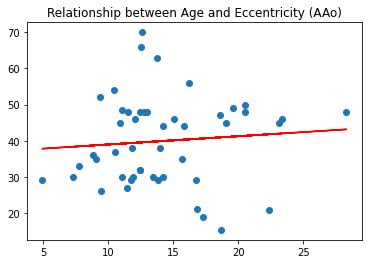

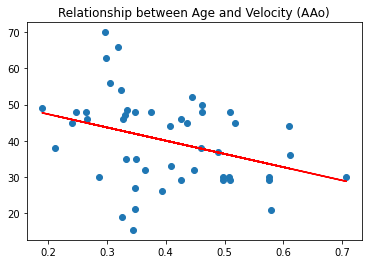

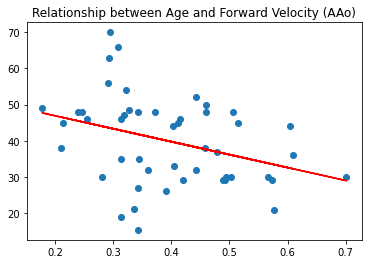

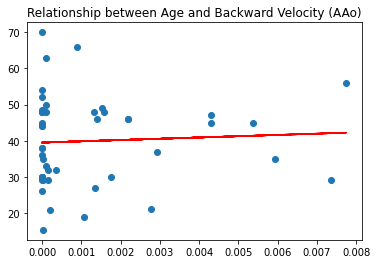

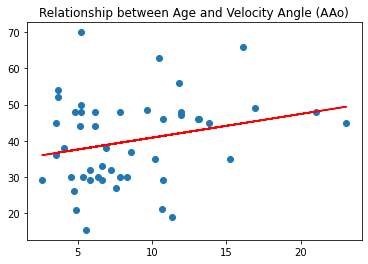

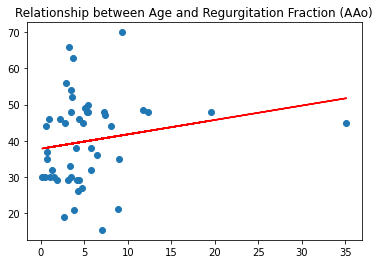

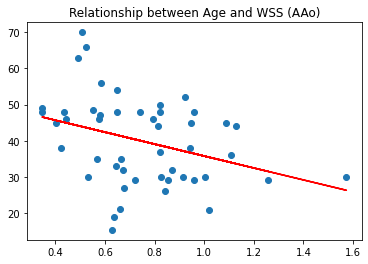

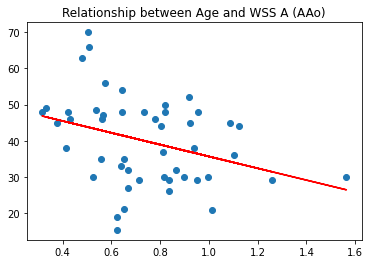

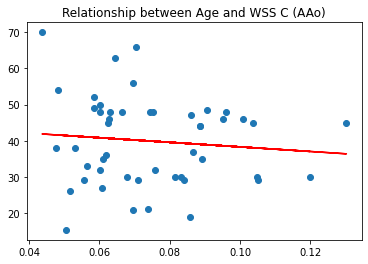

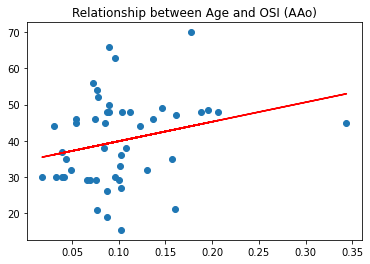

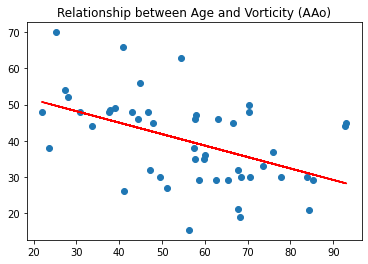

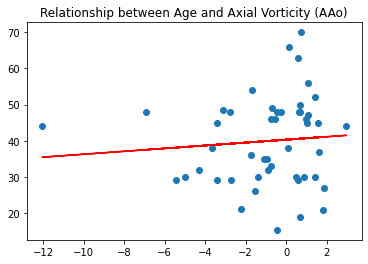

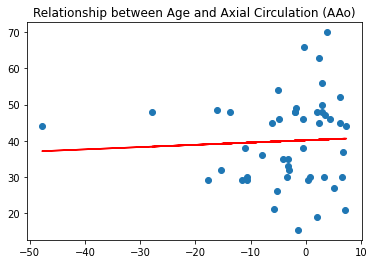

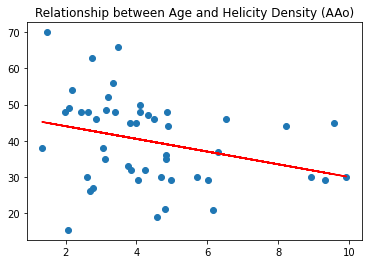

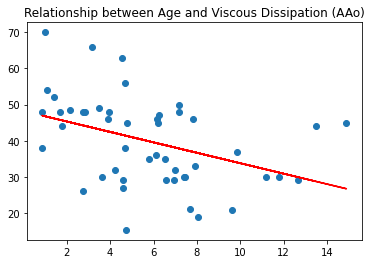

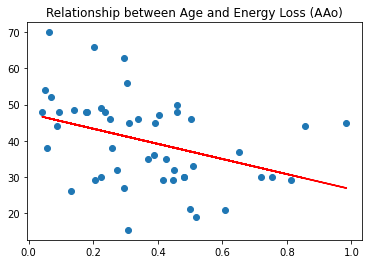

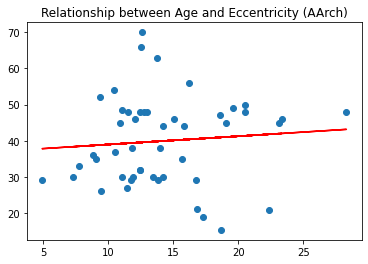

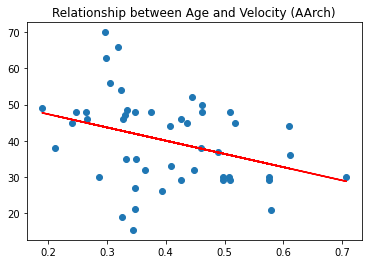

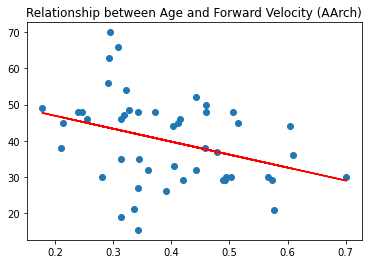

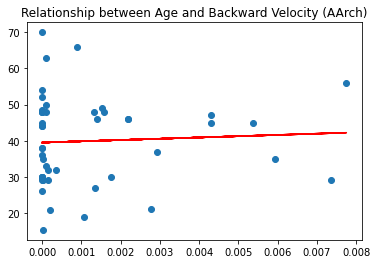

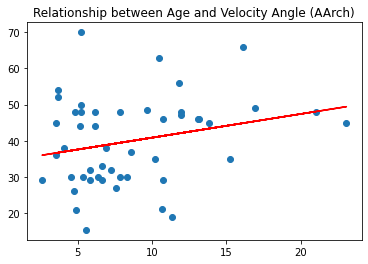

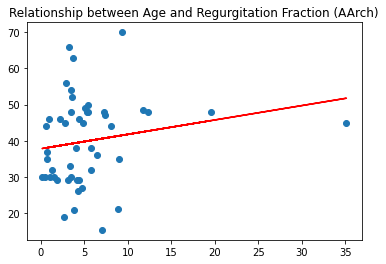

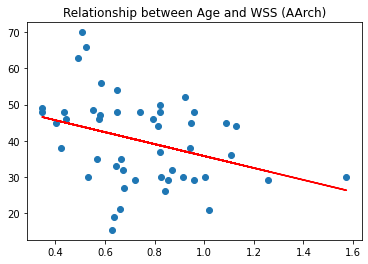

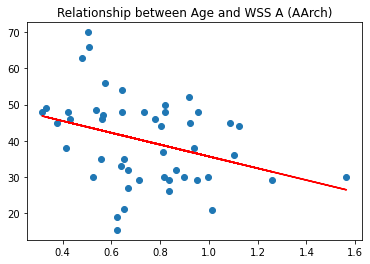

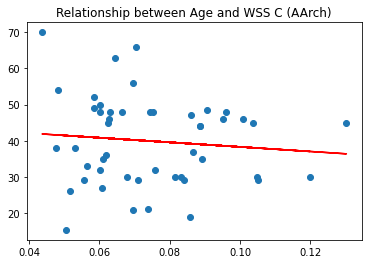

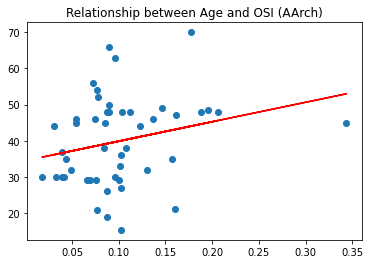

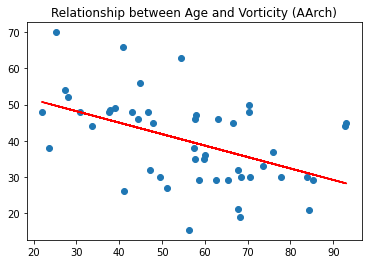

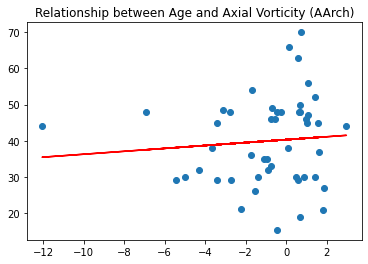

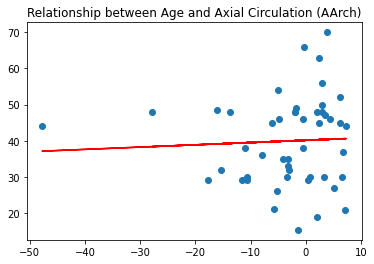

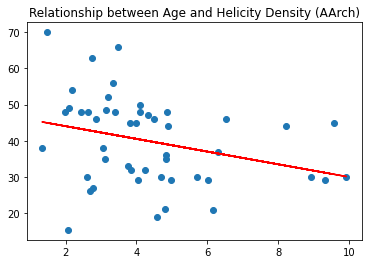

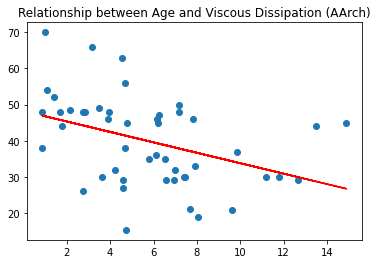

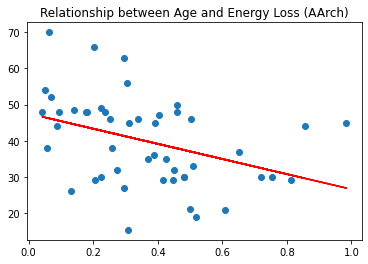

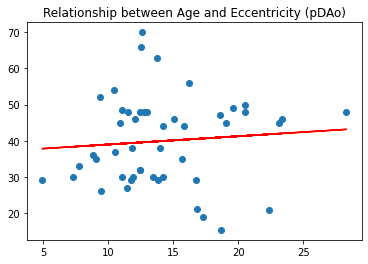

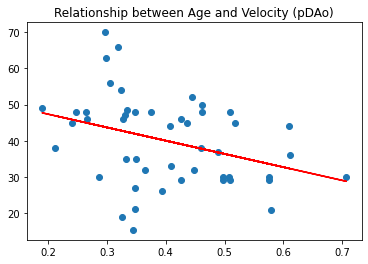

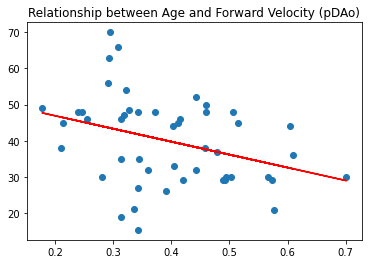

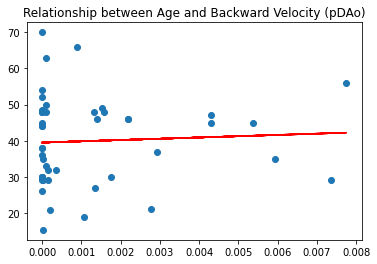

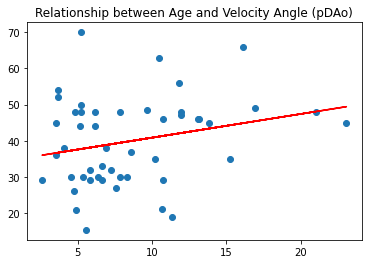

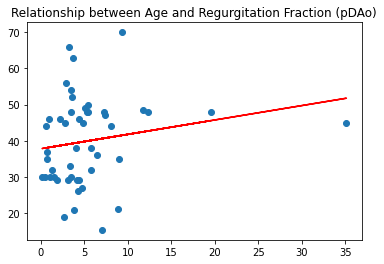

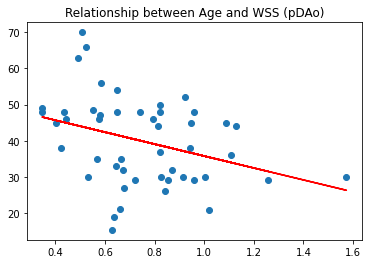

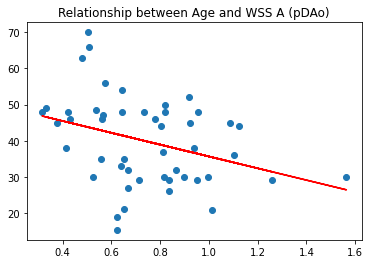

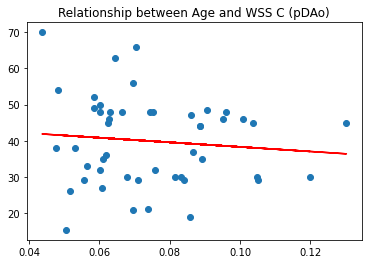

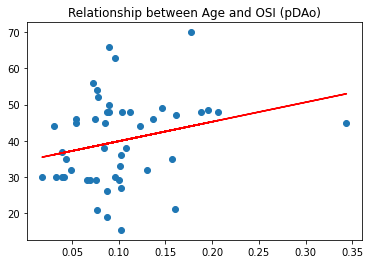

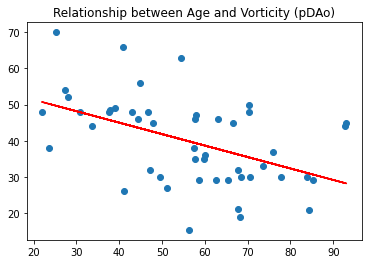

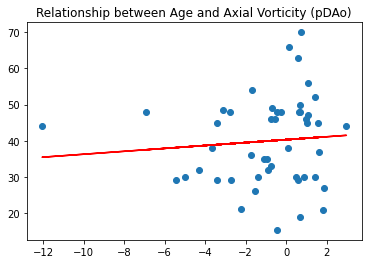

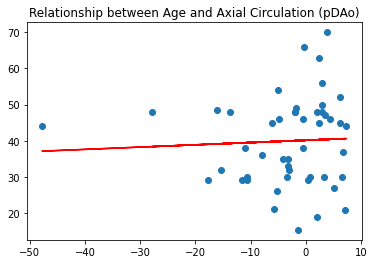

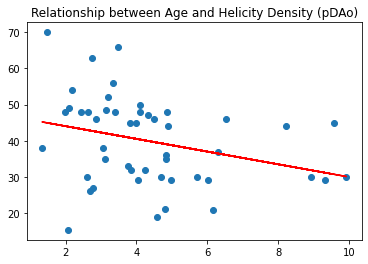

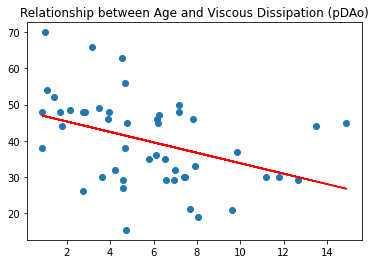

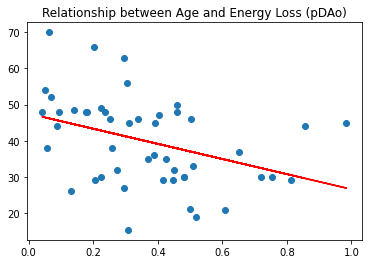

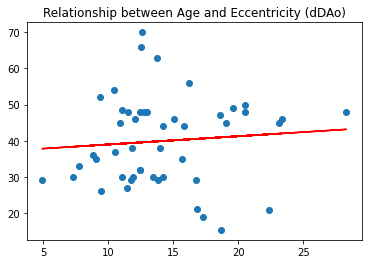

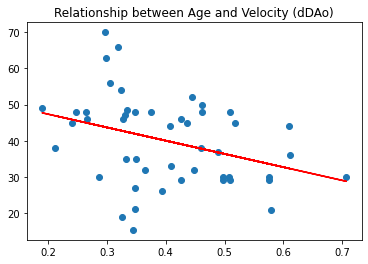

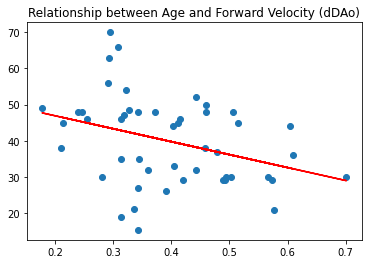

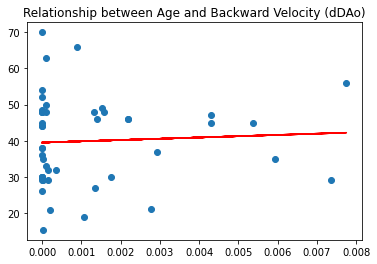

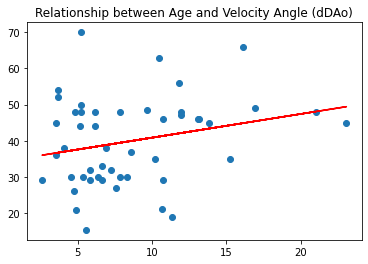

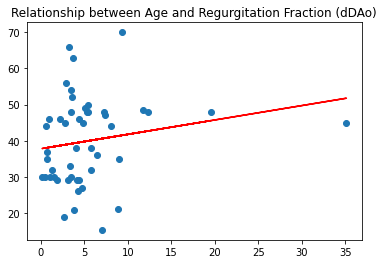

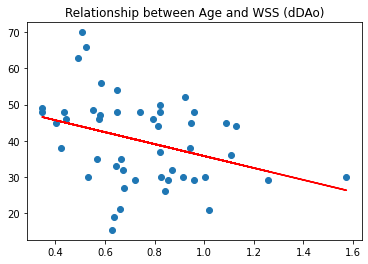

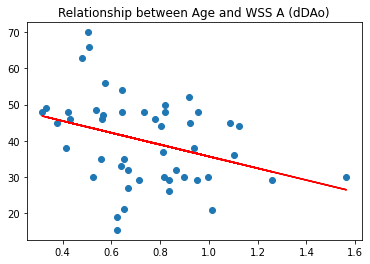

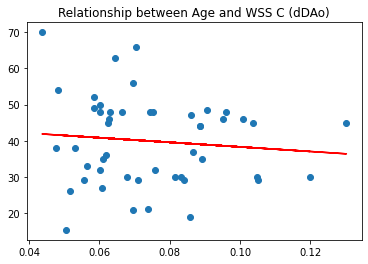

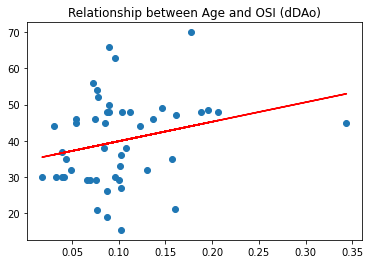

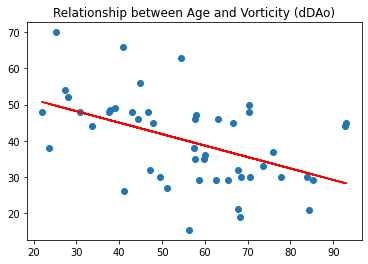

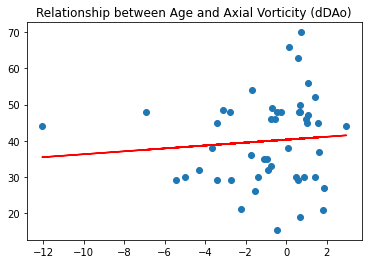

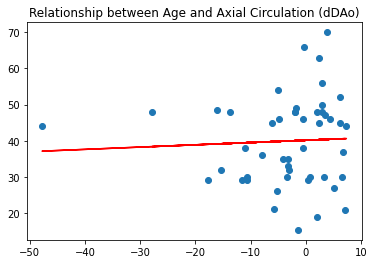

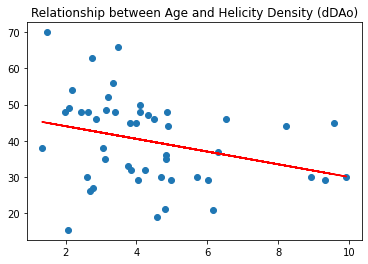

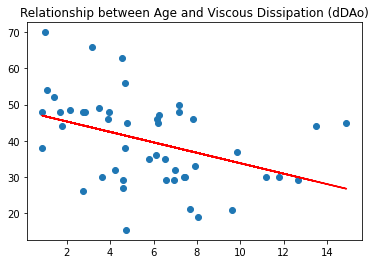

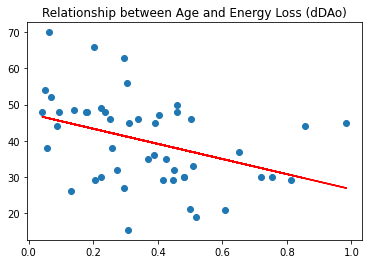

In [55]:
c = 0
for hp in HP_list:
  count = 0
  for data_frames in Hemodynamic_Parameters:
    linear_regressor.fit(data_frames, Y)
    Y_pred = linear_regressor.predict(data_frames)
    plt.scatter(data_frames, Y)
    plt.plot(data_frames, Y_pred, color='red')
    plt.title(f"Relationship between Age and {names[count]} ({sheets[c]})")
    plt.show()
    count += 1
    print(" ")
  c += 1